In [1]:
import pandas as pd
import time
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

In [71]:
df = pd.read_csv('data_lab_1.csv')
df.head()

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,13000000.0,108.0,3,2.70,16.0,51.0,8,False,25.0,NaN,18863.0,16028.0,482.0,755.0
1,3350000.0,40.4,1,NaN,11.0,18.6,1,False,11.0,2.0,12817.0,18603.0,NaN,NaN
2,5196000.0,56.0,2,NaN,5.0,34.3,4,False,8.3,0.0,21741.0,13933.0,90.0,574.0
3,64900000.0,159.0,3,NaN,14.0,NaN,9,False,NaN,0.0,28098.0,6800.0,84.0,234.0
4,10000000.0,100.0,2,3.03,14.0,32.0,13,False,41.0,NaN,31856.0,8098.0,112.0,48.0


In [72]:
df.shape

(23699, 14)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              23699 non-null  float64
 1   total_area         23699 non-null  float64
 2   rooms              23699 non-null  int64  
 3   ceiling_height     14504 non-null  float64
 4   floors_total       23613 non-null  float64
 5   living_area        21796 non-null  float64
 6   floor              23699 non-null  int64  
 7   studio             23699 non-null  bool   
 8   kitchen_area       21421 non-null  float64
 9   balcony            12180 non-null  float64
 10  airports_distance  18157 non-null  float64
 11  centers_distance   18180 non-null  float64
 12  parks_nearest      8079 non-null   float64
 13  ponds_nearest      9110 non-null   float64
dtypes: bool(1), float64(11), int64(2)
memory usage: 2.4 MB


Количество балконов и суммарное количество этажей точно являются целыми числами, их стоит преобразовать в int после обработки пропусков

In [74]:
df.drop_duplicates(inplace = True) # один дубликат

In [75]:
df.describe()

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
count,2.369800e+04,23698.000000,23698.000000,14503.000000,23612.000000,21795.000000,23698.000000,21421.000000,12180.000000,18157.000000,18180.000000,8079.000000,9110.000000
mean,6.541718e+06,60.349404,2.070681,2.771513,10.673513,34.458525,5.892312,10.569807,1.150082,28793.672193,14191.277833,490.804555,517.980900
std,1.088721e+07,35.654647,1.078405,1.261098,6.597140,22.030727,4.885347,5.905438,1.071300,12630.880622,8608.386210,342.317995,277.720643
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,1.000000,13.000000
25%,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,288.000000,294.000000
50%,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,455.000000,502.000000
75%,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,612.000000,729.000000
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3190.000000,1344.000000


# Обработка пропусков

In [76]:
for col in df.columns:
    n = df[col].isna().sum()
    print(f'{col}: {n}')

price: 0
total_area: 0
rooms: 0
ceiling_height: 9195
floors_total: 86
living_area: 1903
floor: 0
studio: 0
kitchen_area: 2277
balcony: 11518
airports_distance: 5541
centers_distance: 5518
parks_nearest: 15619
ponds_nearest: 14588


# Группировка количественных признаков

In [77]:
df.columns

Index(['price', 'total_area', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'studio', 'kitchen_area', 'balcony',
       'airports_distance', 'centers_distance', 'parks_nearest',
       'ponds_nearest'],
      dtype='object')

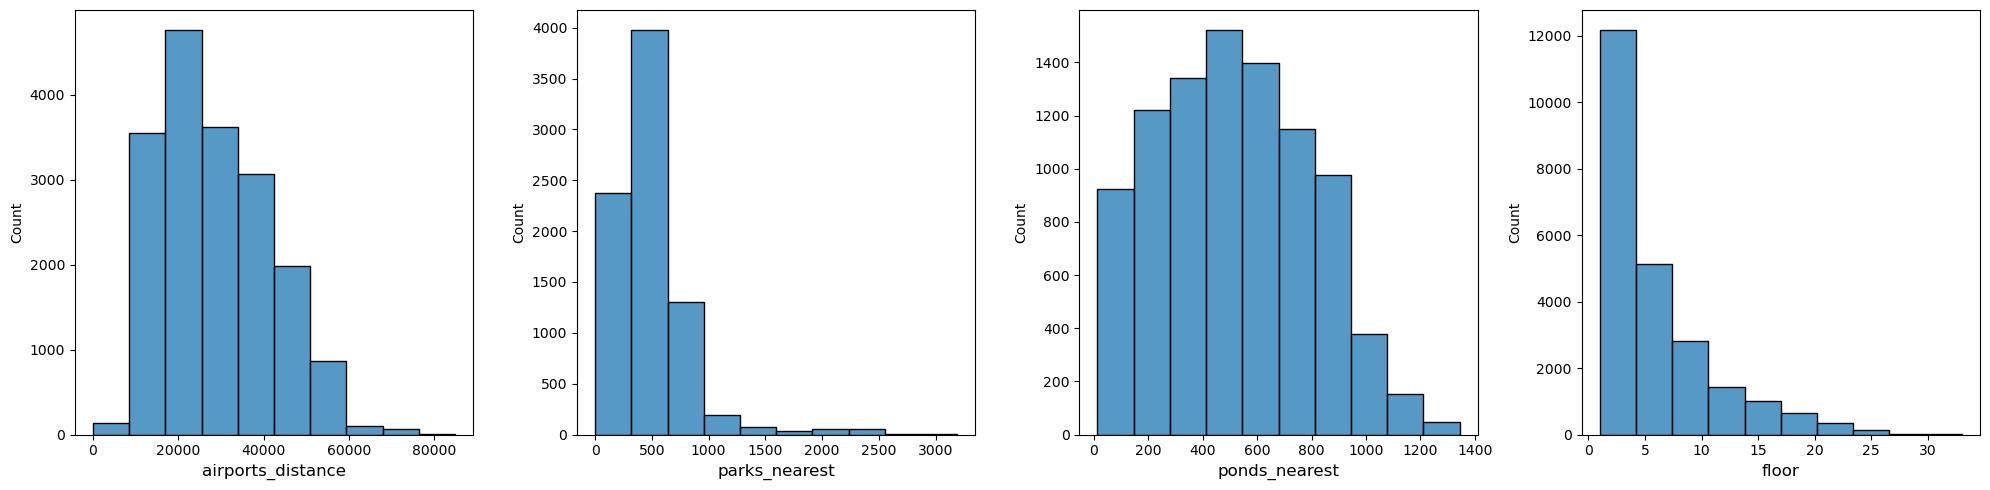

In [78]:
num_to_cat = ['airports_distance','parks_nearest','ponds_nearest', 'floor']
n = 4
k=0
fig, axes = plt.subplots(1, n, figsize=(20, 5))
for i in range(n):
    sns.histplot(ax = axes[i], x = num_to_cat[i], data = df, bins = 10) 
    axes[i].set_xlabel(num_to_cat[k], fontsize=12)
    k+=1
    #axes[i].set_ylabel(cat[i], fontsize=12)
plt.tight_layout()
plt.show()

In [79]:
for i in num_to_cat:
    df[i] = df[i].fillna(-1)

In [80]:
bins_air = [-1,0, 20000, 40000, 60000, 100000]
bins_parks = [-1, 0, 1000, 10000]
bins_ponds = [-1,0,800, 10000]
bins_floor = [0,5,10,50]
lab_air = ['uknown', '<20k', '20k-40k', '40k-60k', '>60k']
lab_parks = ['uknown', 'close', 'far']
lab_ponds = ['uknown', 'close', 'far']
lab_floor =['low', 'medium', 'high']
df['airports_cat'] = pd.cut(df[num_to_cat[0]],bins = bins_air, labels = lab_air, include_lowest=True)
df['parks_cat'] = pd.cut(df[num_to_cat[1]],bins = bins_parks, labels = lab_parks, include_lowest=True)
df['ponds_cat'] = pd.cut(df[num_to_cat[2]],bins = bins_ponds, labels = lab_ponds, include_lowest=True)
df['floor_cat'] = pd.cut(df[num_to_cat[3]],bins = bins_floor, labels = lab_floor, include_lowest=True)

In [81]:
df_new = df.drop(['parks_nearest', 'ponds_nearest'], axis = 1)
df_new['ceiling_height'] = df_new['ceiling_height'].fillna(df_new['ceiling_height'].median())
df_new['balcony_category'] = np.where(
    df_new['balcony'].isna(), 'Uknown',
    np.where(df_new['balcony'] == 0, 'No balconies', 
    np.where(df_new['balcony'] == 1, 'One balcony', 'Many balconies'
            )))
df_new.drop(['balcony'], axis = 1, inplace = True)
df_new.dropna(subset = ['floors_total','living_area', 'kitchen_area',
                       'airports_distance', 'centers_distance'], inplace=True)

In [82]:
df_new['floors_total'] = df_new['floors_total'].astype(int)

In [83]:
df_new['cat_rooms'] = np.where(
    df_new['rooms']== 0, '0',
    np.where(df_new['rooms'] == 1, '1', 
    np.where(df_new['rooms'] == 2, '2',
    np.where(df_new['rooms'] == 3, '3',
    np.where(df_new['rooms'] == 4, '4',
    np.where(df_new['rooms'] == 5, '5','6+'
            ))))))
df_new.drop(['rooms'], axis = 1, inplace = True)

In [84]:
df_new.shape

(16293, 16)

Высоту потолков можно заменить на медиану, т.к. в большинстве квартир она стандартная   
Количество этажей заменить не получится, т.к. слишком много разных домов, поэтому пропуски удалим   
Жилплощадь, площадь кухни, расстояние до аэропорта и до центра также заменить не получится, замена на медиану некорректна. В дальнейшем может преобразуем их в категориальные тоже   
Количество балконов также имеют 10к+ пропусков, можно попробовать преобразовать столбец в категориальный с категориями: нет балкона, один балкон, больше одного балкона и неизвестно


In [85]:
for col in df_new.columns:
    n = df_new[col].isna().sum()
    print(f'{col}: {n}')

price: 0
total_area: 0
ceiling_height: 0
floors_total: 0
living_area: 0
floor: 0
studio: 0
kitchen_area: 0
airports_distance: 0
centers_distance: 0
airports_cat: 0
parks_cat: 0
ponds_cat: 0
floor_cat: 0
balcony_category: 0
cat_rooms: 0


In [86]:
df_new = df_new[df_new['ceiling_height']<5]
df_new.shape

(16274, 16)

Предположим, что высота потолков не превышает 5 метров 

# Одномерный анализ данных

In [89]:
df_new.columns

Index(['price', 'total_area', 'ceiling_height', 'floors_total', 'living_area',
       'floor', 'studio', 'kitchen_area', 'airports_distance',
       'centers_distance', 'airports_cat', 'parks_cat', 'ponds_cat',
       'floor_cat', 'balcony_category', 'cat_rooms'],
      dtype='object')

In [90]:
cat = ['studio', 'balcony_category', 'cat_rooms', 'airports_cat', 'parks_cat', 'ponds_cat',
       'floor_cat']
metric = [x for x in df_new.columns if x not in cat]
metric

['price',
 'total_area',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'kitchen_area',
 'airports_distance',
 'centers_distance']

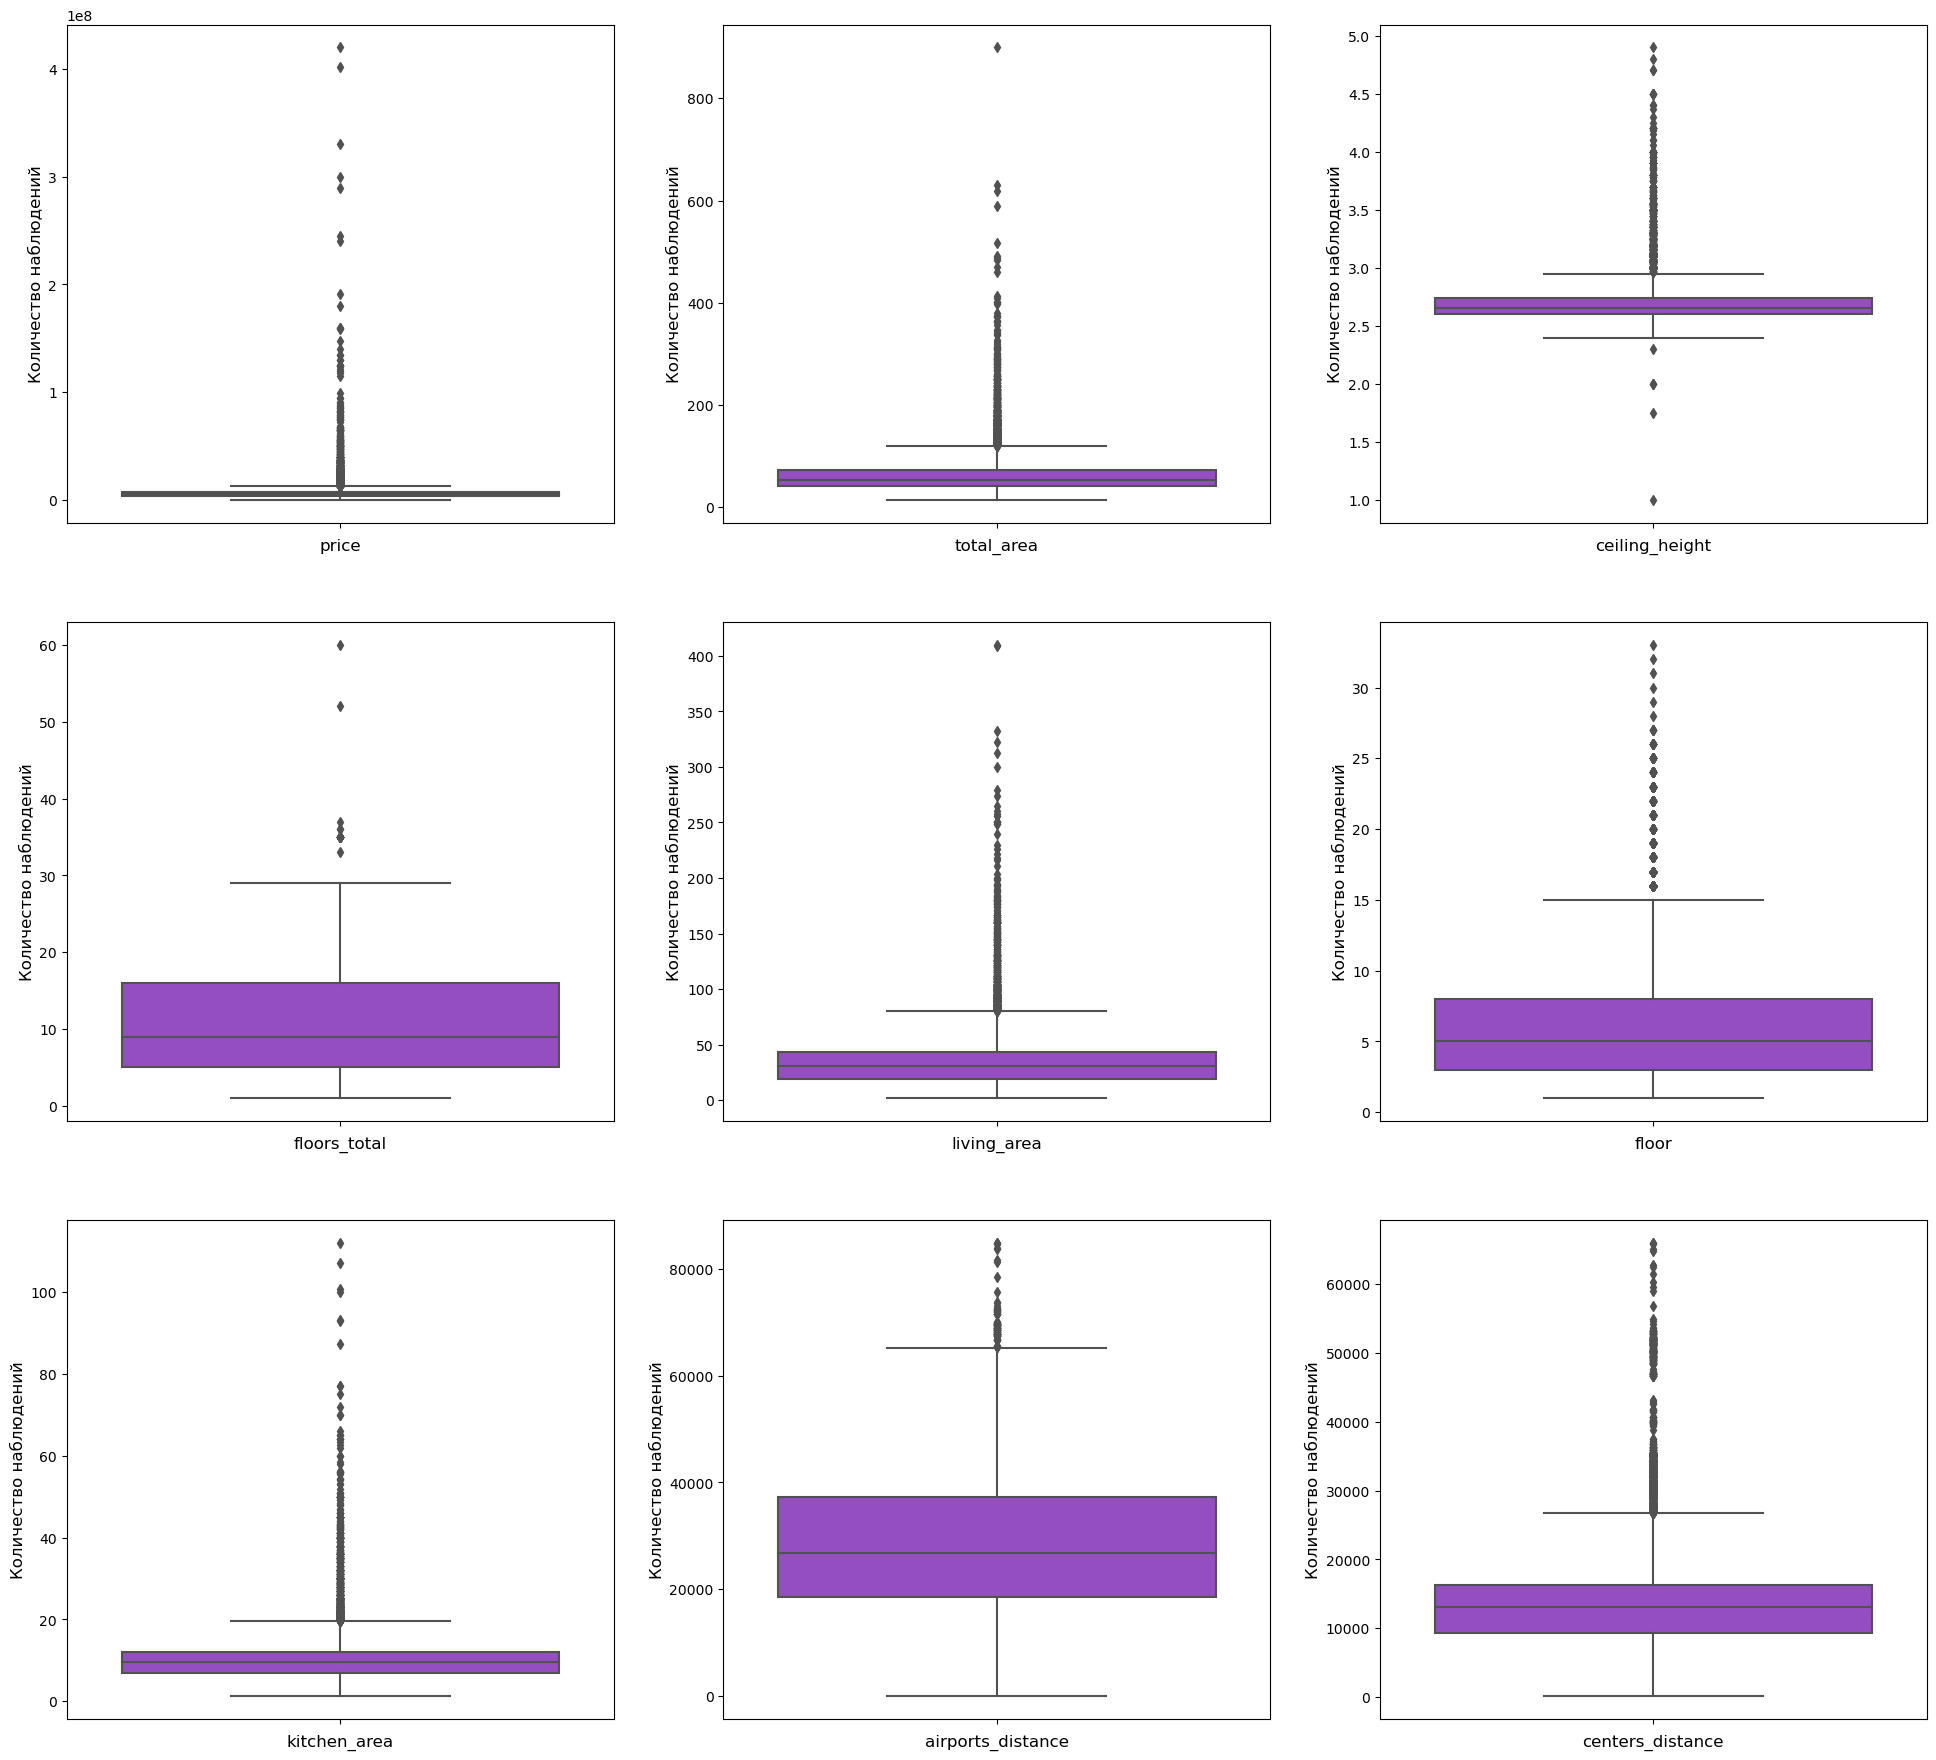

In [172]:
fig, axes = plt.subplots(m, n, figsize=(24, 22))
k = 0
for i in range(m):
    for j in range(n):
            sns.boxplot(ax = axes[i,j], data = df_new, y = factors[k], color = '#9939d6')
            axes[i,j].set_ylabel('Количество наблюдений', fontsize = 12)
            axes[i,j].set_xlabel(factors[k], fontsize = 12)
            k+=1
            if k >= 9:
                break

plt.show()

In [91]:
out_dict = dict.fromkeys(metric)
for column in metric:
    Q1 = df_new[column].quantile(0.25)
    Q3 = df_new[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    length = len(df_new[(df_new[column] < lower_bound) | (df_new[column] > upper_bound)])
    out_dict[column] = length
out_dict

{'price': 1389,
 'total_area': 921,
 'ceiling_height': 2201,
 'floors_total': 28,
 'living_area': 639,
 'floor': 1023,
 'kitchen_area': 1030,
 'airports_distance': 96,
 'centers_distance': 1621}

Оставшиеся выбросы, скорее всего, не являются ошибкой набора, а являются квартирами высокого класса.   
Необходимость их удаления зависит от цели построения модели.   

# Многомерный анализ

In [193]:
from scipy.stats import spearmanr

In [194]:
def spearman_test(data_1, data_2):
    correlation = spearmanr(data_1, data_2)
    return '{0:.2f}\n{1:.2f}'.format(*correlation)

In [197]:
df_new[metric].corr(method = 'spearman')

,price,total_area,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_distance,centers_distance
price,1.000000,0.847160,0.464980,0.051156,0.731324,0.068856,0.626806,-0.014987,-0.469462
total_area,0.847160,1.000000,0.368137,-0.070005,0.925176,-0.031519,0.539482,-0.011816,-0.284503
ceiling_height,0.464980,0.368137,1.000000,0.007345,0.257869,0.025280,0.482478,-0.044571,-0.322959
floors_total,0.051156,-0.070005,0.007345,1.000000,-0.201837,0.602332,0.326576,0.122752,0.176783
living_area,0.731324,0.925176,0.257869,-0.201837,1.000000,-0.112243,0.297998,-0.037386,-0.269727
floor,0.068856,-0.031519,0.025280,0.602332,-0.112243,1.000000,0.214640,0.080950,0.093948
kitchen_area,0.626806,0.539482,0.482478,0.326576,0.297998,0.214640,1.000000,0.035339,-0.191772
airports_distance,-0.014987,-0.011816,-0.044571,0.122752,-0.037386,0.080950,0.035339,1.000000,0.143085
centers_distance,-0.469462,-0.284503,-0.322959,0.176783,-0.269727,0.093948,-0.191772,0.143085,1.000000


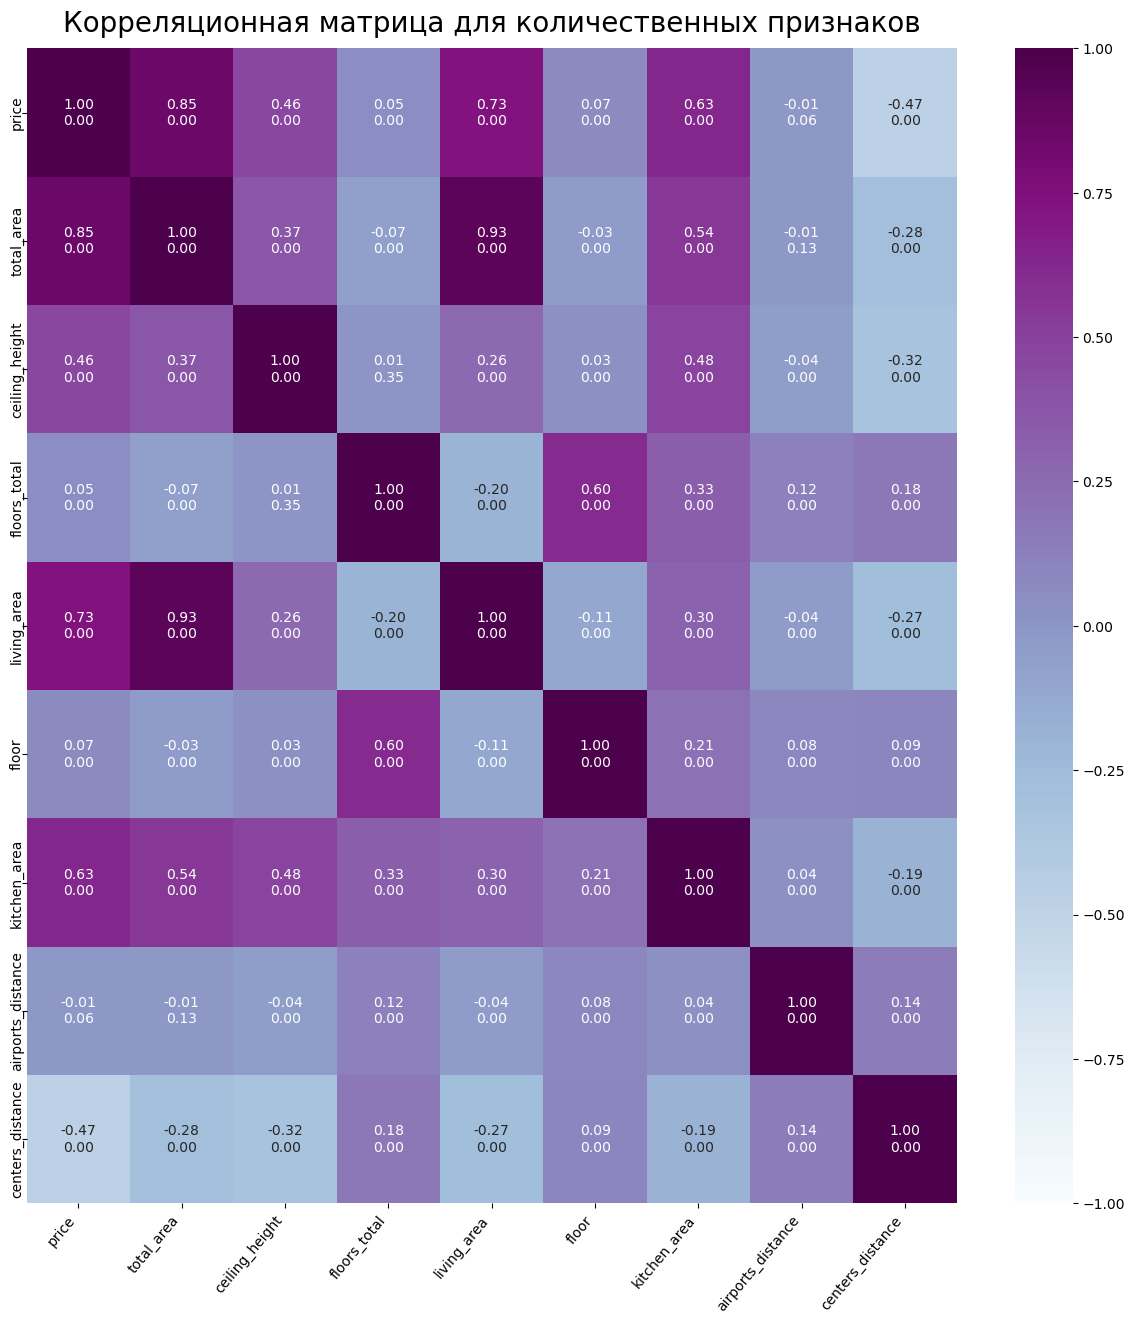

In [199]:
correlation = df_new[metric].corr(method = 'spearman')
text = [[spearman_test(df_new[i], df_new[j]) for i in metric] for j in metric]
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1,  annot=text, fmt='', cmap='BuPu'
)
heatmap.set_title('Корреляционная матрица для количественных признаков', fontdict={'fontsize':20}, pad=12)
heatmap.set_xticklabels(metric, rotation = 50, ha='right')
heatmap.set_yticklabels(metric,  ha ='center')
plt.show()

Наиболее сильное влияние на стоимость квартиры оказывает признак **Общая площадь**   
Жилая площадь имеет слишком сильную корреляцию с общей площадью, поэтому их нельзя включать в модель вместе.   
**Площадь кухни** имеет значимую умеренную корреляцию с общей площадью и высотой потолков, но ее можно включить в модель, т.к. мультиколлинеарность ниже влияния на таргет   
Высота потолков имеет умеренную корреляцию с таргетом, но корреляция с площадью кухни сильнее, поэтому этот признак под вопросом   
**Расстояние до центра** имеет умеренную корреляцию с таргетом и отрицательную силу связи. Интеркорреляция с фичами присутствует, но она недостаточно сильная, что позволяет включить признак в модель   

**Количественные признаки в модель:**    
- Общая площадь;
- площадь кухни;
- расстояние до центра

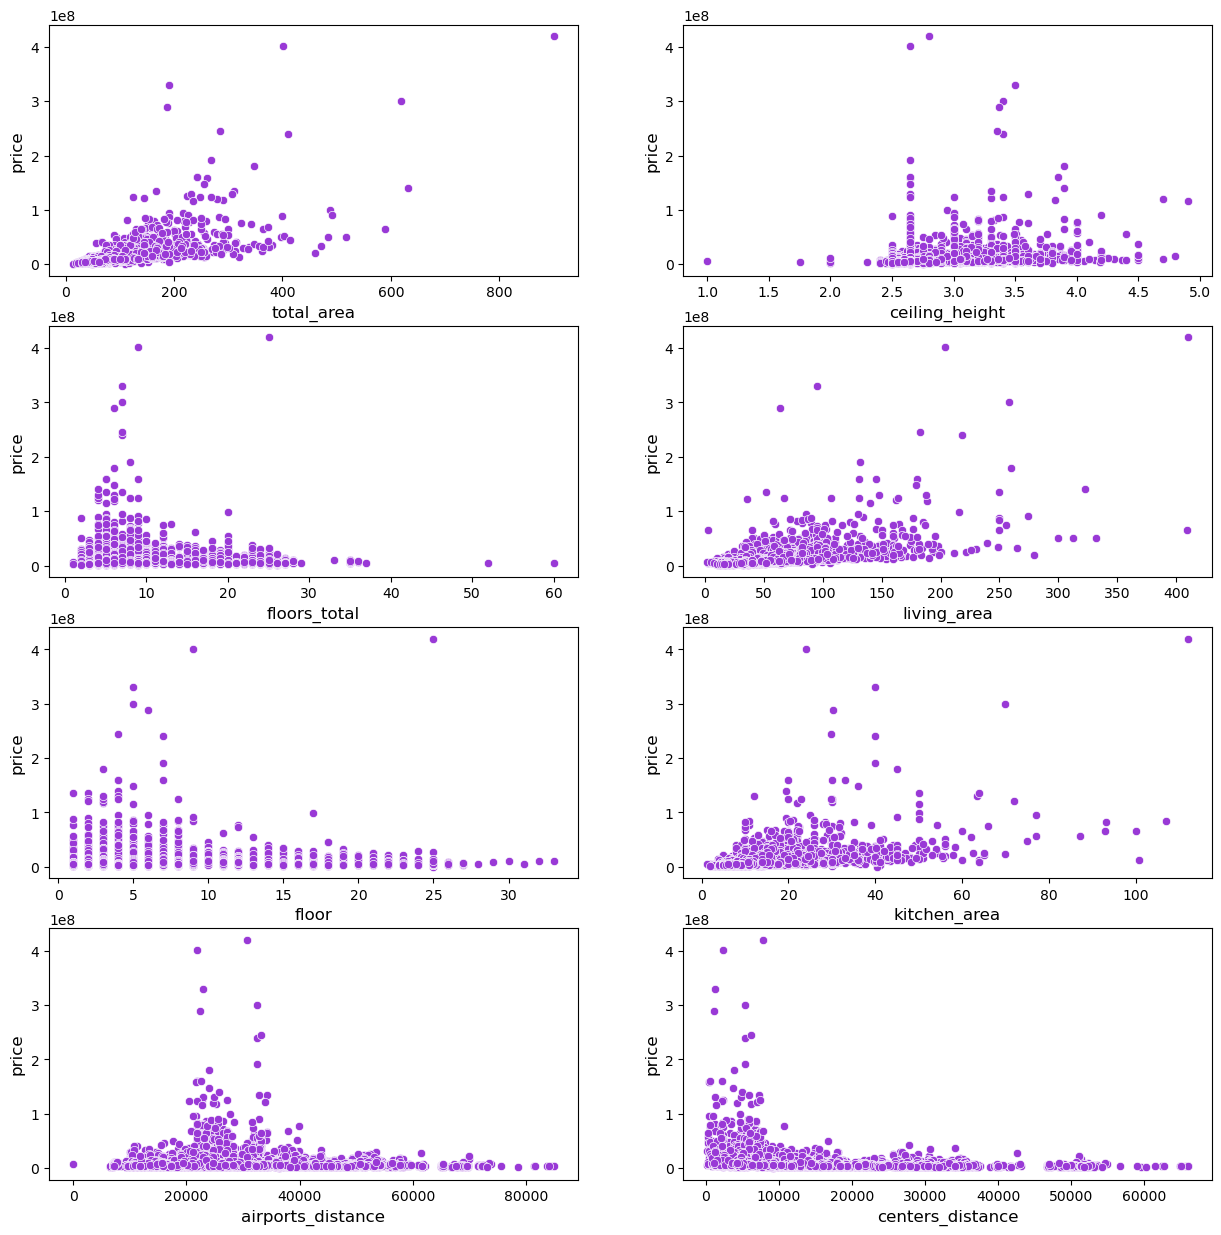

In [203]:
n=2
m=4
fig, axes = plt.subplots(m, n, figsize=(15, 15))
k = 0
factors = metric[1:]
for i in range(m):
    for j in range(n):
            sns.scatterplot(ax = axes[i,j], data = df_new, x = factors[k], y = metric[0], color = '#9939d6')
            axes[i,j].set_ylabel('price', fontsize = 12)
            axes[i,j].set_xlabel(factors[k], fontsize = 12)
            k+=1
            if k >= 9:
                break

plt.show()

# Категориальные признаки

В процессе удаления выбросов и зачистки пустых строк не осталось студий(    
Исключаем этот признак из рассмотрения


In [92]:
cat = cat[1:]

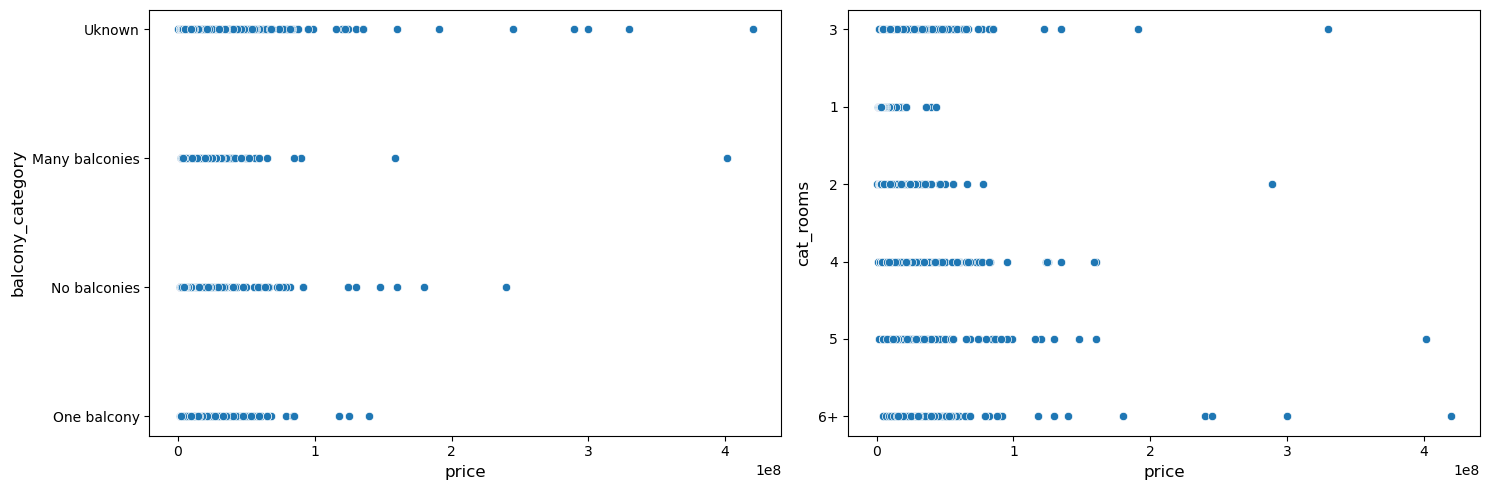

In [93]:
n = 2
fig, axes = plt.subplots(1, n, figsize=(15, 5))
for i in range(n):
    sns.scatterplot(ax=axes[i], x='price', y=cat[i], data=df_new)
    axes[i].set_xlabel('price', fontsize=12)
    axes[i].set_ylabel(cat[i], fontsize=12)
plt.tight_layout()
plt.show()

Визуально влияния нет, проведем стат тесты

In [95]:
from scipy.stats import kstest, mannwhitneyu, ttest_ind, levene, kruskal

In [96]:
result = {}
for column in cat:
    groups = [df_new[df_new[column] == i]['price'].values for i in df_new[column].unique() ]
    if any([kstest(i, 'norm').pvalue<0.05 for i in groups]):
        if len(groups) >2:
            result[column] = [kruskal(*groups), levene(*groups, center='median'), levene(*groups, center='mean')]
        else:
            result[column] = [mannwhitneyu(*groups), levene(*groups, center='median'), levene(*groups, center='mean')]
    else:
        result[column] = [ttest_ind(*groups), levene(*groups, center='median'), levene(*groups, center='mean')]
result

{'balcony_category': [KruskalResult(statistic=197.03482293829722, pvalue=1.844297572043913e-42),
  LeveneResult(statistic=6.698442459992807, pvalue=0.00016310791389546512),
  LeveneResult(statistic=10.131431403993881, pvalue=1.1553444697950972e-06)],
 'cat_rooms': [KruskalResult(statistic=6440.110989314122, pvalue=0.0),
  LeveneResult(statistic=321.23349707839594, pvalue=0.0),
  LeveneResult(statistic=551.3314130847345, pvalue=0.0)],
 'airports_cat': [KruskalResult(statistic=926.5397999109516, pvalue=2.9594386775598914e-199),
  LeveneResult(statistic=88.65622658679575, pvalue=1.1569651307345213e-74),
  LeveneResult(statistic=153.99173439491872, pvalue=1.5426321901232084e-129)],
 'parks_cat': [KruskalResult(statistic=474.8720664280315, pvalue=7.635561335865881e-104),
  LeveneResult(statistic=86.42276390551545, pvalue=4.6240711623755676e-38),
  LeveneResult(statistic=147.26172651729425, pvalue=4.1398223159181217e-64)],
 'ponds_cat': [KruskalResult(statistic=291.0508763209228, pvalue=6.29

p-value меньше уровня значимости =>    
отвергаем гипотезу о статистической значимости средних и дисперсий таргета внутри групп по каждому признаку =>   
**все признаки могут оказывать влияние на таргет**

# Кодировка категориальных признаков

In [118]:
numeric = ['price', 'total_area', 'kitchen_area', 'centers_distance']
features = numeric + cat
features

['price',
 'total_area',
 'kitchen_area',
 'centers_distance',
 'balcony_category',
 'cat_rooms',
 'airports_cat',
 'parks_cat',
 'ponds_cat',
 'floor_cat']

In [124]:
df_encoded = pd.get_dummies(df_new[features], columns=cat)
df_encoded.head()

,price,total_area,kitchen_area,centers_distance,balcony_category_Many balconies,balcony_category_No balconies,balcony_category_One balcony,balcony_category_Uknown,cat_rooms_1,cat_rooms_2,...,airports_cat_>60k,parks_cat_uknown,parks_cat_close,parks_cat_far,ponds_cat_uknown,ponds_cat_close,ponds_cat_far,floor_cat_low,floor_cat_medium,floor_cat_high
0,13000000.0,108.0,25.0,16028.0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,3350000.0,40.4,11.0,18603.0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2,5196000.0,56.0,8.3,13933.0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
4,10000000.0,100.0,41.0,8098.0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
6,3700000.0,37.3,14.4,19143.0,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0


# Скалирование/нормализация

In [127]:
X_train, X_test, y_train, y_test = train_test_split( 
    df_encoded.drop('price', axis = 1),
    df_encoded['price'],
    test_size=0.3,
    random_state=42)

In [128]:
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train[numeric[1:]])
X_test_scaled = scaler_x.transform(X_test[numeric[1:]])

In [129]:
for n in range(len(numeric[1:])):
    X_train[numeric[1:][n]] = X_train_scaled[:,n]

In [132]:
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()